<a href="https://colab.research.google.com/github/farhad06/For-Practics/blob/main/NLP/BOW%26N_GRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [7]:
def spam(x):
  if x=='spam':
    return 1
  else:
    return 0  

In [11]:
df['Spam']=df['Category'].apply(spam)

In [12]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df.shape

(5572, 3)

In [55]:
#split the dataset
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size=0.2)

In [16]:
X_train.head()

2756                                We r outside already.
2354    Please CALL 08712402902 immediately as there i...
1026     I have a sore throat. It's scratches when I talk
3604    I'm not sure, I was just checking out what was...
2276           Is that on the telly? No its Brdget Jones!
Name: Message, dtype: object

In [17]:
X_train.shape,y_train.shape

((4457,), (4457,))

In [19]:
X_test.shape,y_test.shape

((1115,), (1115,))

In [20]:
type(X_train.values)

numpy.ndarray

In [24]:
#create BOW
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_cv=v.fit_transform(X_train)
X_train_cv

<4457x7806 sparse matrix of type '<class 'numpy.int64'>'
	with 59315 stored elements in Compressed Sparse Row format>

In [23]:
type(X_train_cv)

scipy.sparse.csr.csr_matrix

In [25]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
X_train_cv.shape

(4457, 7806)

In [28]:
v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [34]:
X_train_np=X_train_cv.toarray()

In [35]:
type(X_train_np)

numpy.ndarray

In [36]:
np.where(X_train_np[0]!=0)

(array([ 934, 5045, 7476]),)

In [37]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [38]:
X_test_cv = v.transform(X_test)

## Exercise about BOW

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [46]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable
df_imdb=pd.read_csv("/content/drive/MyDrive/Dataset/IMDB Dataset.csv")


#2. print the shape of the data
print(df_imdb.shape)

#3. print top 5 datapoints
df_imdb.head()


(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [42]:
df_imdb.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [49]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
df_imdb['Category']=df_imdb['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

In [51]:
df_imdb.head(7)

,review,sentiment,Category
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
5,"Probably my all-time favorite movie, a story o...",positive,1
6,I sure would like to see a resurrection of a u...,positive,1


In [52]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.
df_imdb['Category'].value_counts()


1    25000
0    25000
Name: Category, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_imdb.review, df_imdb.Category, test_size=0.2)

In [57]:
#1. create a pipeline object
clf=Pipeline([('vectorizer',CountVectorizer()),('random_forest',(RandomForestClassifier(n_estimators=50,criterion='entropy')))])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred=clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4984
           1       0.85      0.85      0.85      5016

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [58]:
%%time
#1. create a pipeline object
clf=Pipeline([('vectorizer',CountVectorizer()),
              ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))
              ])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred=clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      4984
           1       0.66      0.67      0.67      5016

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

CPU times: user 1min 1s, sys: 3.14 s, total: 1min 4s
Wall time: 1min 4s


In [59]:
%%time
#1. create a pipeline object
clf=Pipeline([('vectorizer',CountVectorizer()),
              ('Multi NB', MultinomialNB()) 
              ])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred=clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4984
           1       0.87      0.83      0.85      5016

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

CPU times: user 9.02 s, sys: 41.2 ms, total: 9.07 s
Wall time: 9.1 s


# N-Gram

In [5]:
df_news=pd.read_json("/content/drive/MyDrive/Dataset/news_dataset.json")

In [6]:
print(df_news.shape)
df_news.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [7]:
df_news.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

## Handling Imbalance Dataset

---



In [9]:
df_news.category.unique()

array(['SCIENCE', 'BUSINESS', 'CRIME', 'SPORTS'], dtype=object)

In [10]:
from pandas.core.common import random_state
min_sample=1381
df_business=df_news[df_news.category=='BUSINESS'].sample(min_sample,random_state=2022)
df_science=df_news[df_news.category=='SCIENCE'].sample(min_sample,random_state=2022)
df_crime=df_news[df_news.category=='CRIME'].sample(min_sample,random_state=2022)
df_sports=df_news[df_news.category=='SPORTS'].sample(min_sample,random_state=2022)

In [12]:
df_balance=pd.concat([df_business,df_science,df_crime,df_sports],axis=0)

In [13]:
df_balance.category.value_counts()

BUSINESS    1381
SCIENCE     1381
CRIME       1381
SPORTS      1381
Name: category, dtype: int64

In [14]:
df_balance.shape

(5524, 2)

In [16]:
target={'BUSINESS':0,'SPORTS':1,'CRIME':2,'SCIENCE':3}
df_balance['catagory_num']=df_balance['category'].map({'BUSINESS':0,'SPORTS':1,'CRIME':2,'SCIENCE':3})

In [17]:
df_balance.head()

,text,category,catagory_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [22]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balance.text, 
    df_balance.catagory_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balance.catagory_num
)



In [23]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [25]:
#preprocesses the text
import spacy
nlp=spacy.load('en_core_web_sm')
def preprocesses_text(text):
  #remove stopwords and lemmatization
  doc=nlp(text)
  filtered_text=[]
  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    else:
      filtered_text.append(token.lemma_)  
  return " ".join(filtered_text)     

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [26]:
df_balance.head()

,text,category,catagory_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [27]:
df_balance['preprocesses_text']=df_balance['text'].apply(preprocesses_text)

In [28]:
df_balance.head()

,text,category,catagory_num,preprocesses_text
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,gcc Business leader remain Confident face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [30]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balance.preprocesses_text, 
    df_balance.catagory_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balance.catagory_num
)



In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       276
           1       0.92      0.82      0.86       277
           2       0.82      0.91      0.86       276
           3       0.90      0.82      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[240,   9,  16,  11],
       [  7, 227,  34,   9],
       [ 17,   2, 252,   5],
       [ 33,  10,   7, 226]])

Text(69.0, 0.5, 'Truth')

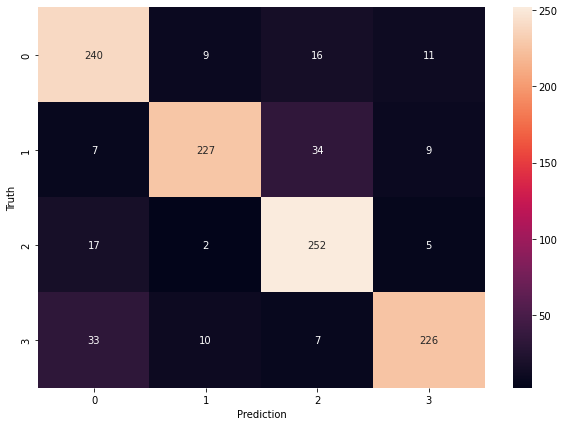

In [33]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')